# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'UCI_data.csv'
df = pd.read_csv(file, on_bad_lines='skip')
df.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


In [3]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

In [4]:
df.shape

(19735, 28)

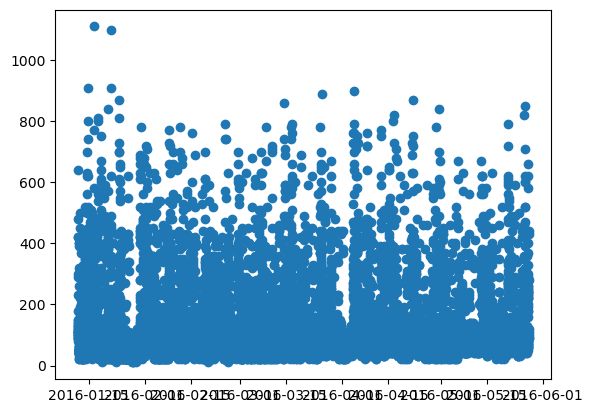

In [5]:
df['date'] = pd.to_datetime(df['date'])
plt.scatter(df['date'], df["TARGET_energy"])
plt.show()

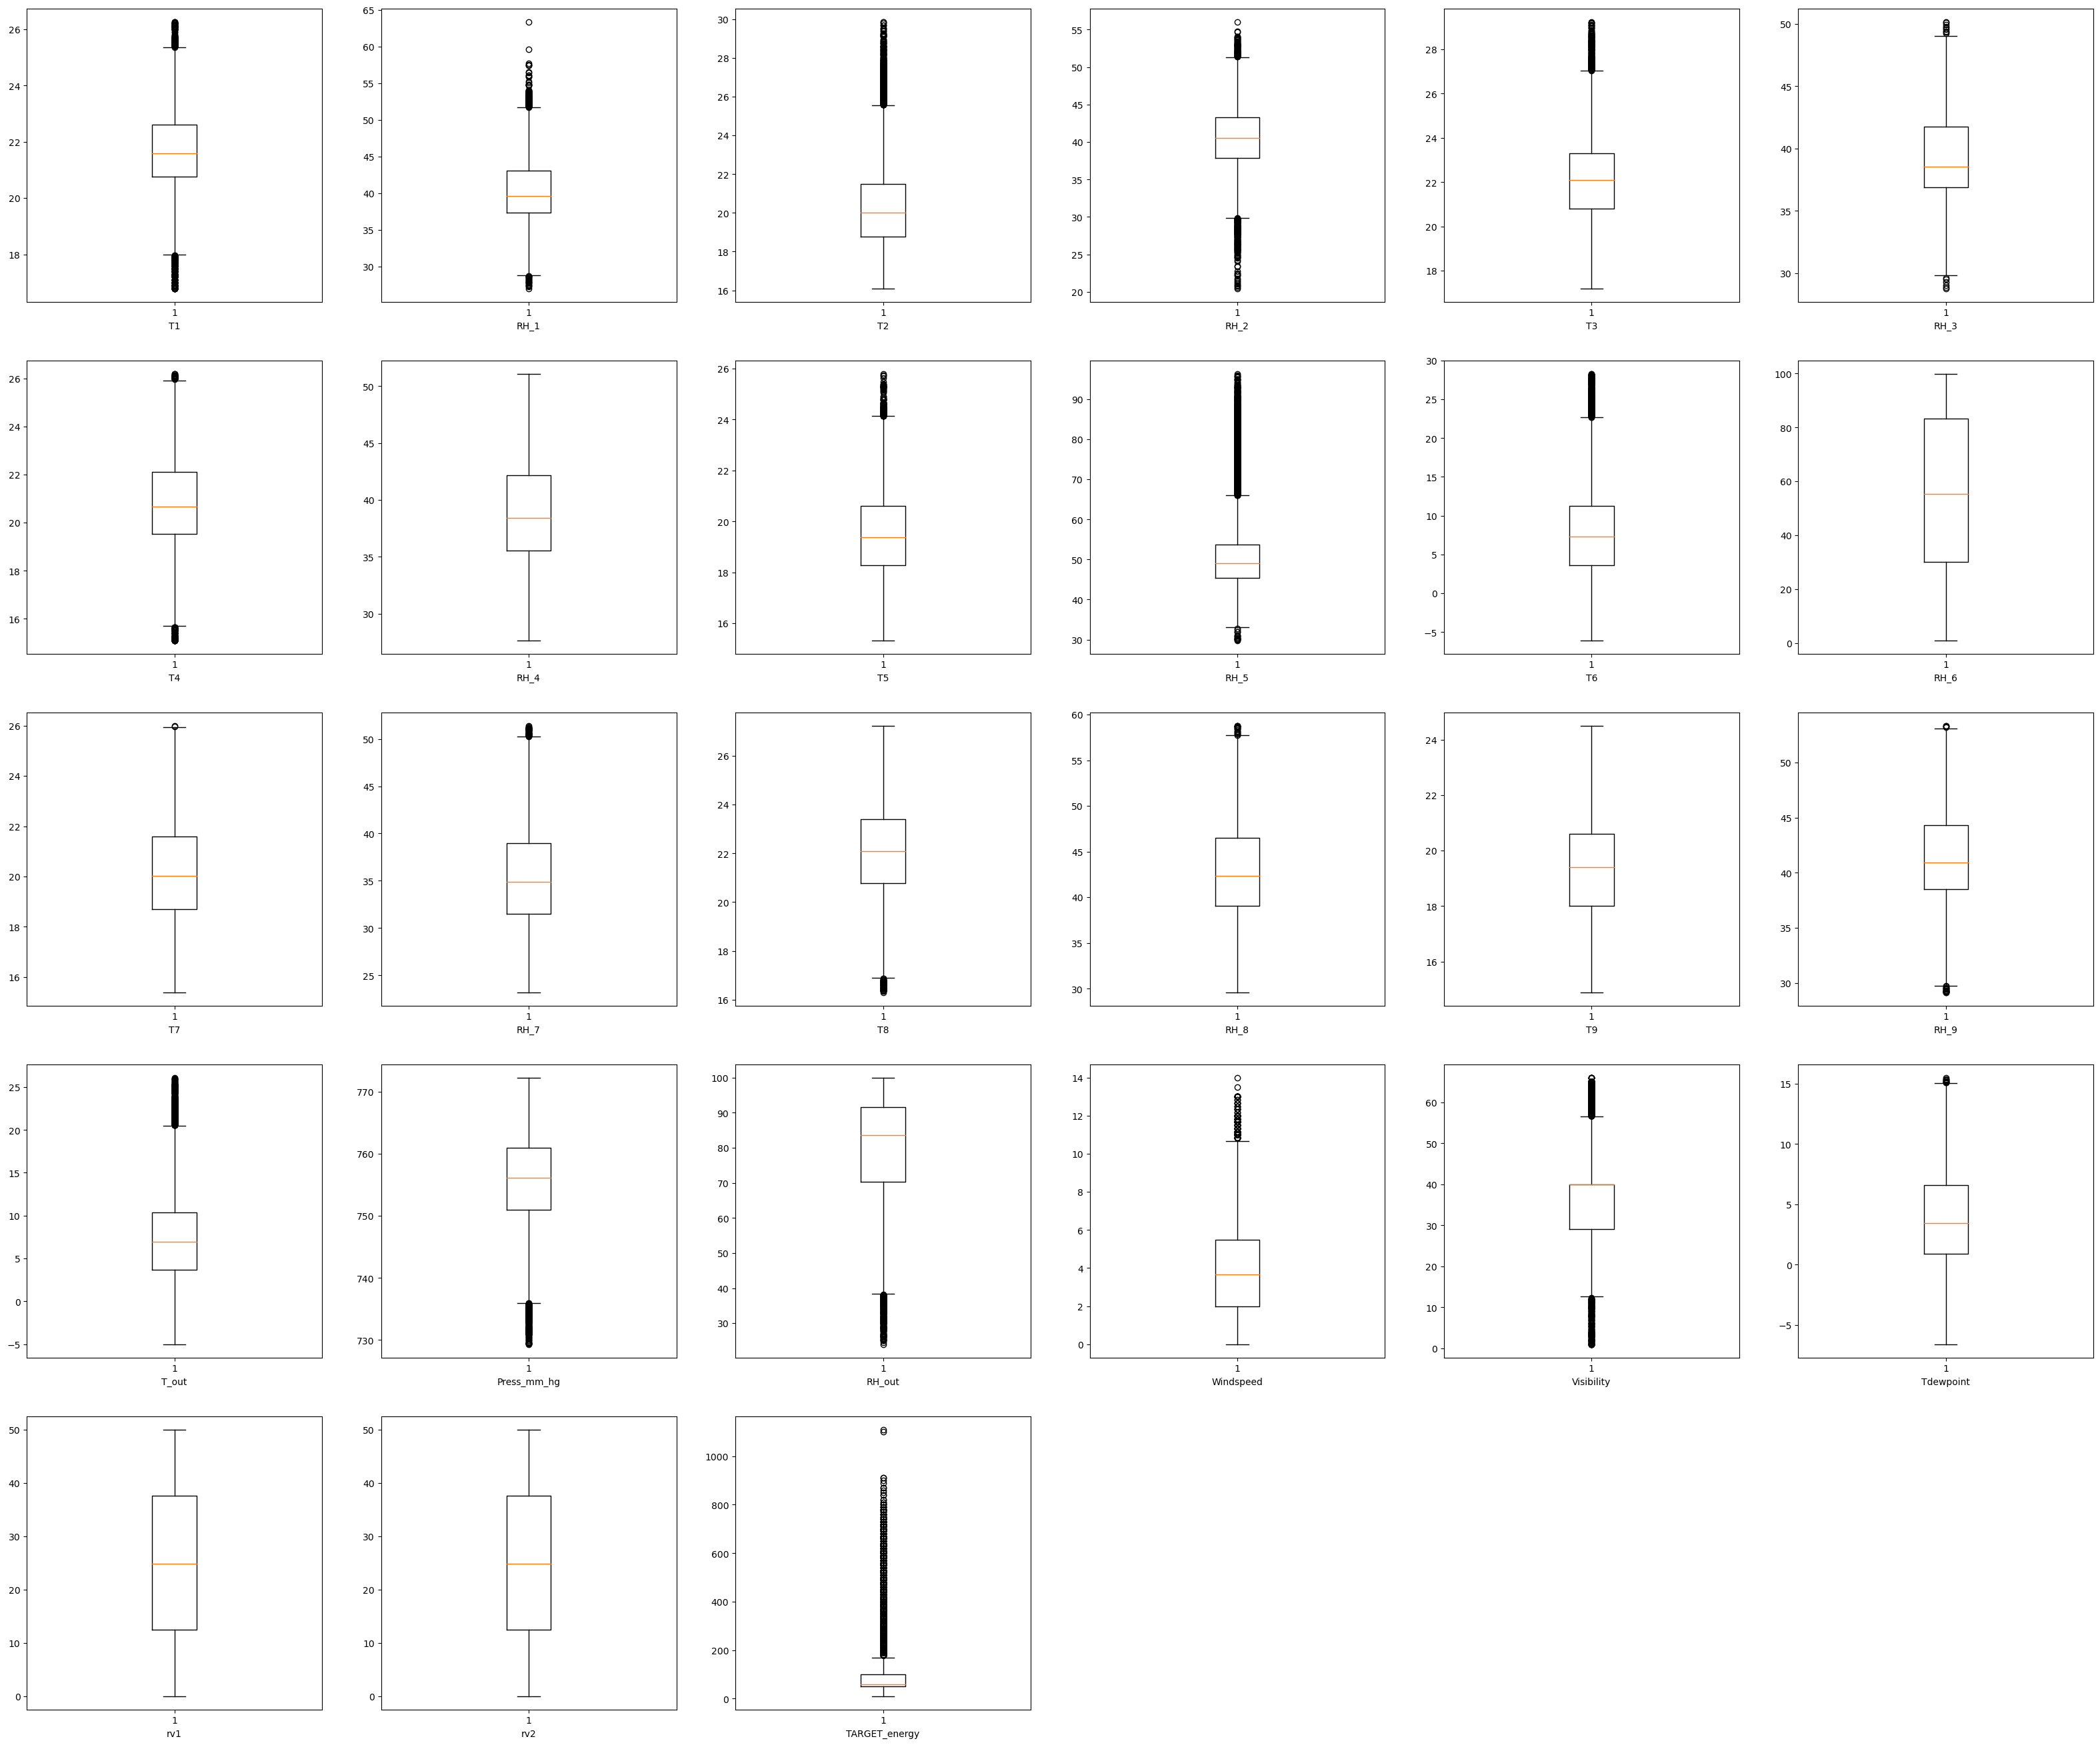

In [6]:
df = df.set_index('date')
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [7]:
for i, col in enumerate(df.columns[:-1]):
   
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]

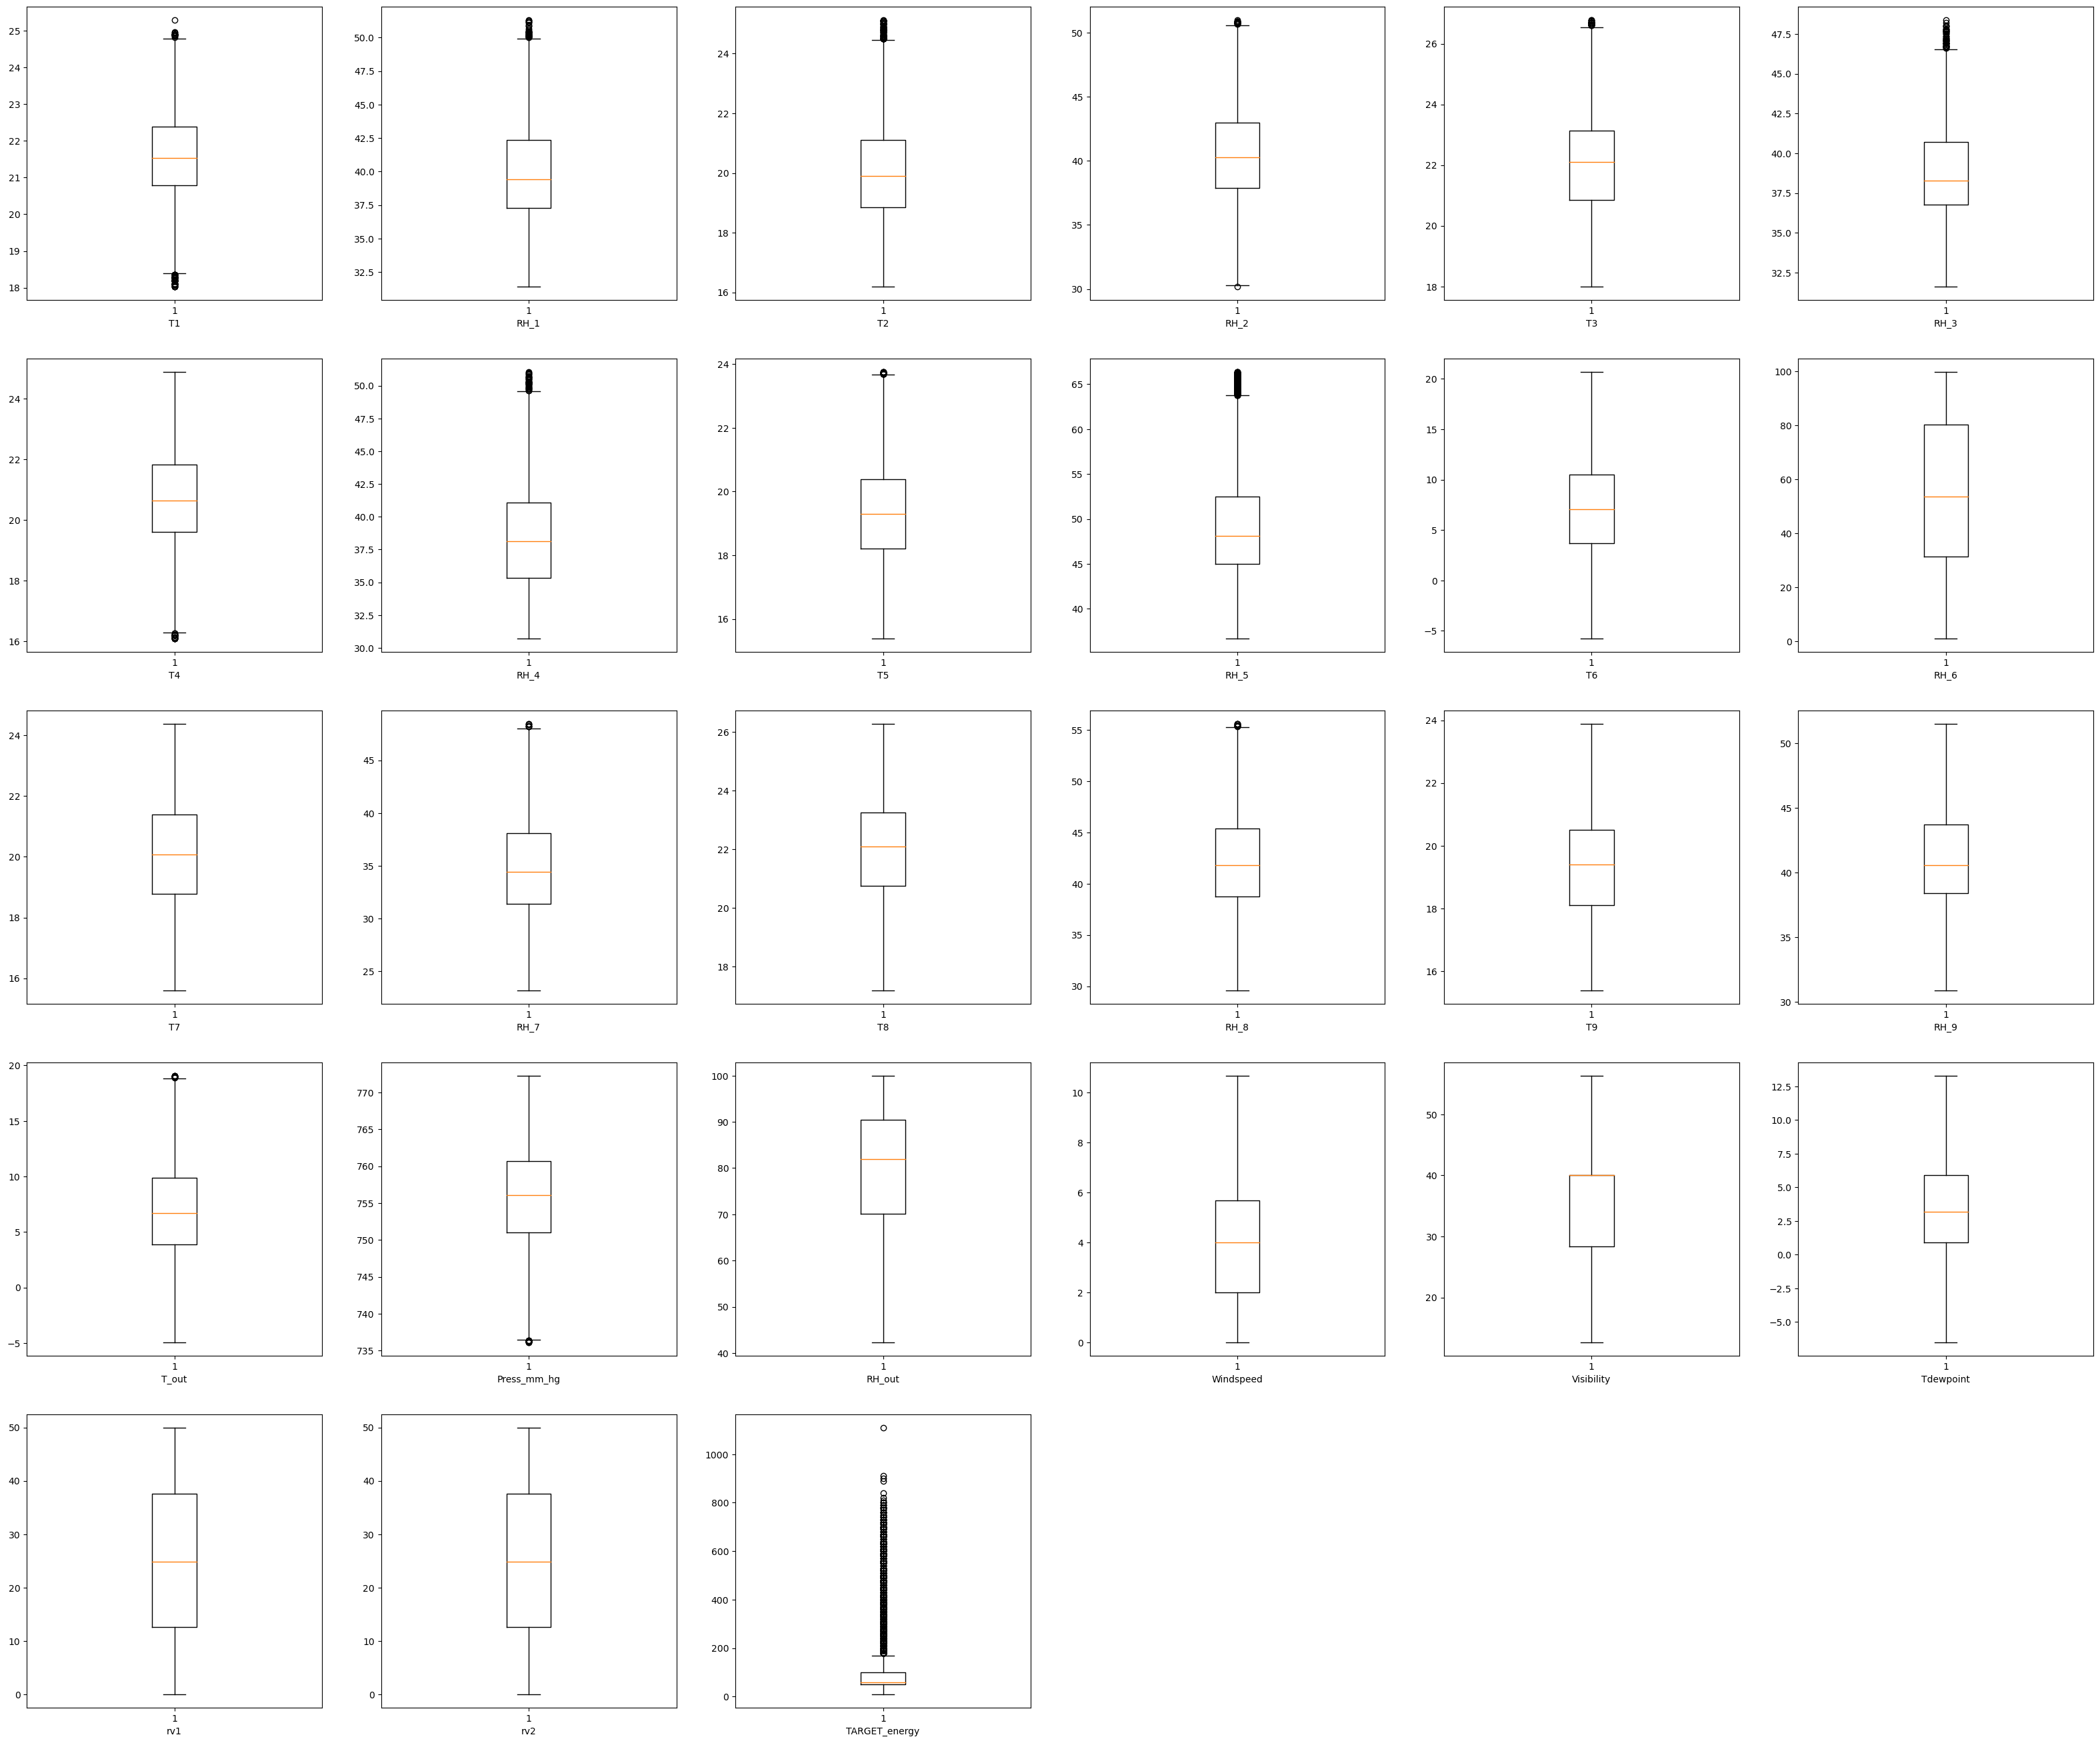

In [8]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [9]:
df.shape

(13670, 27)

In [10]:
df.isna().sum()

T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

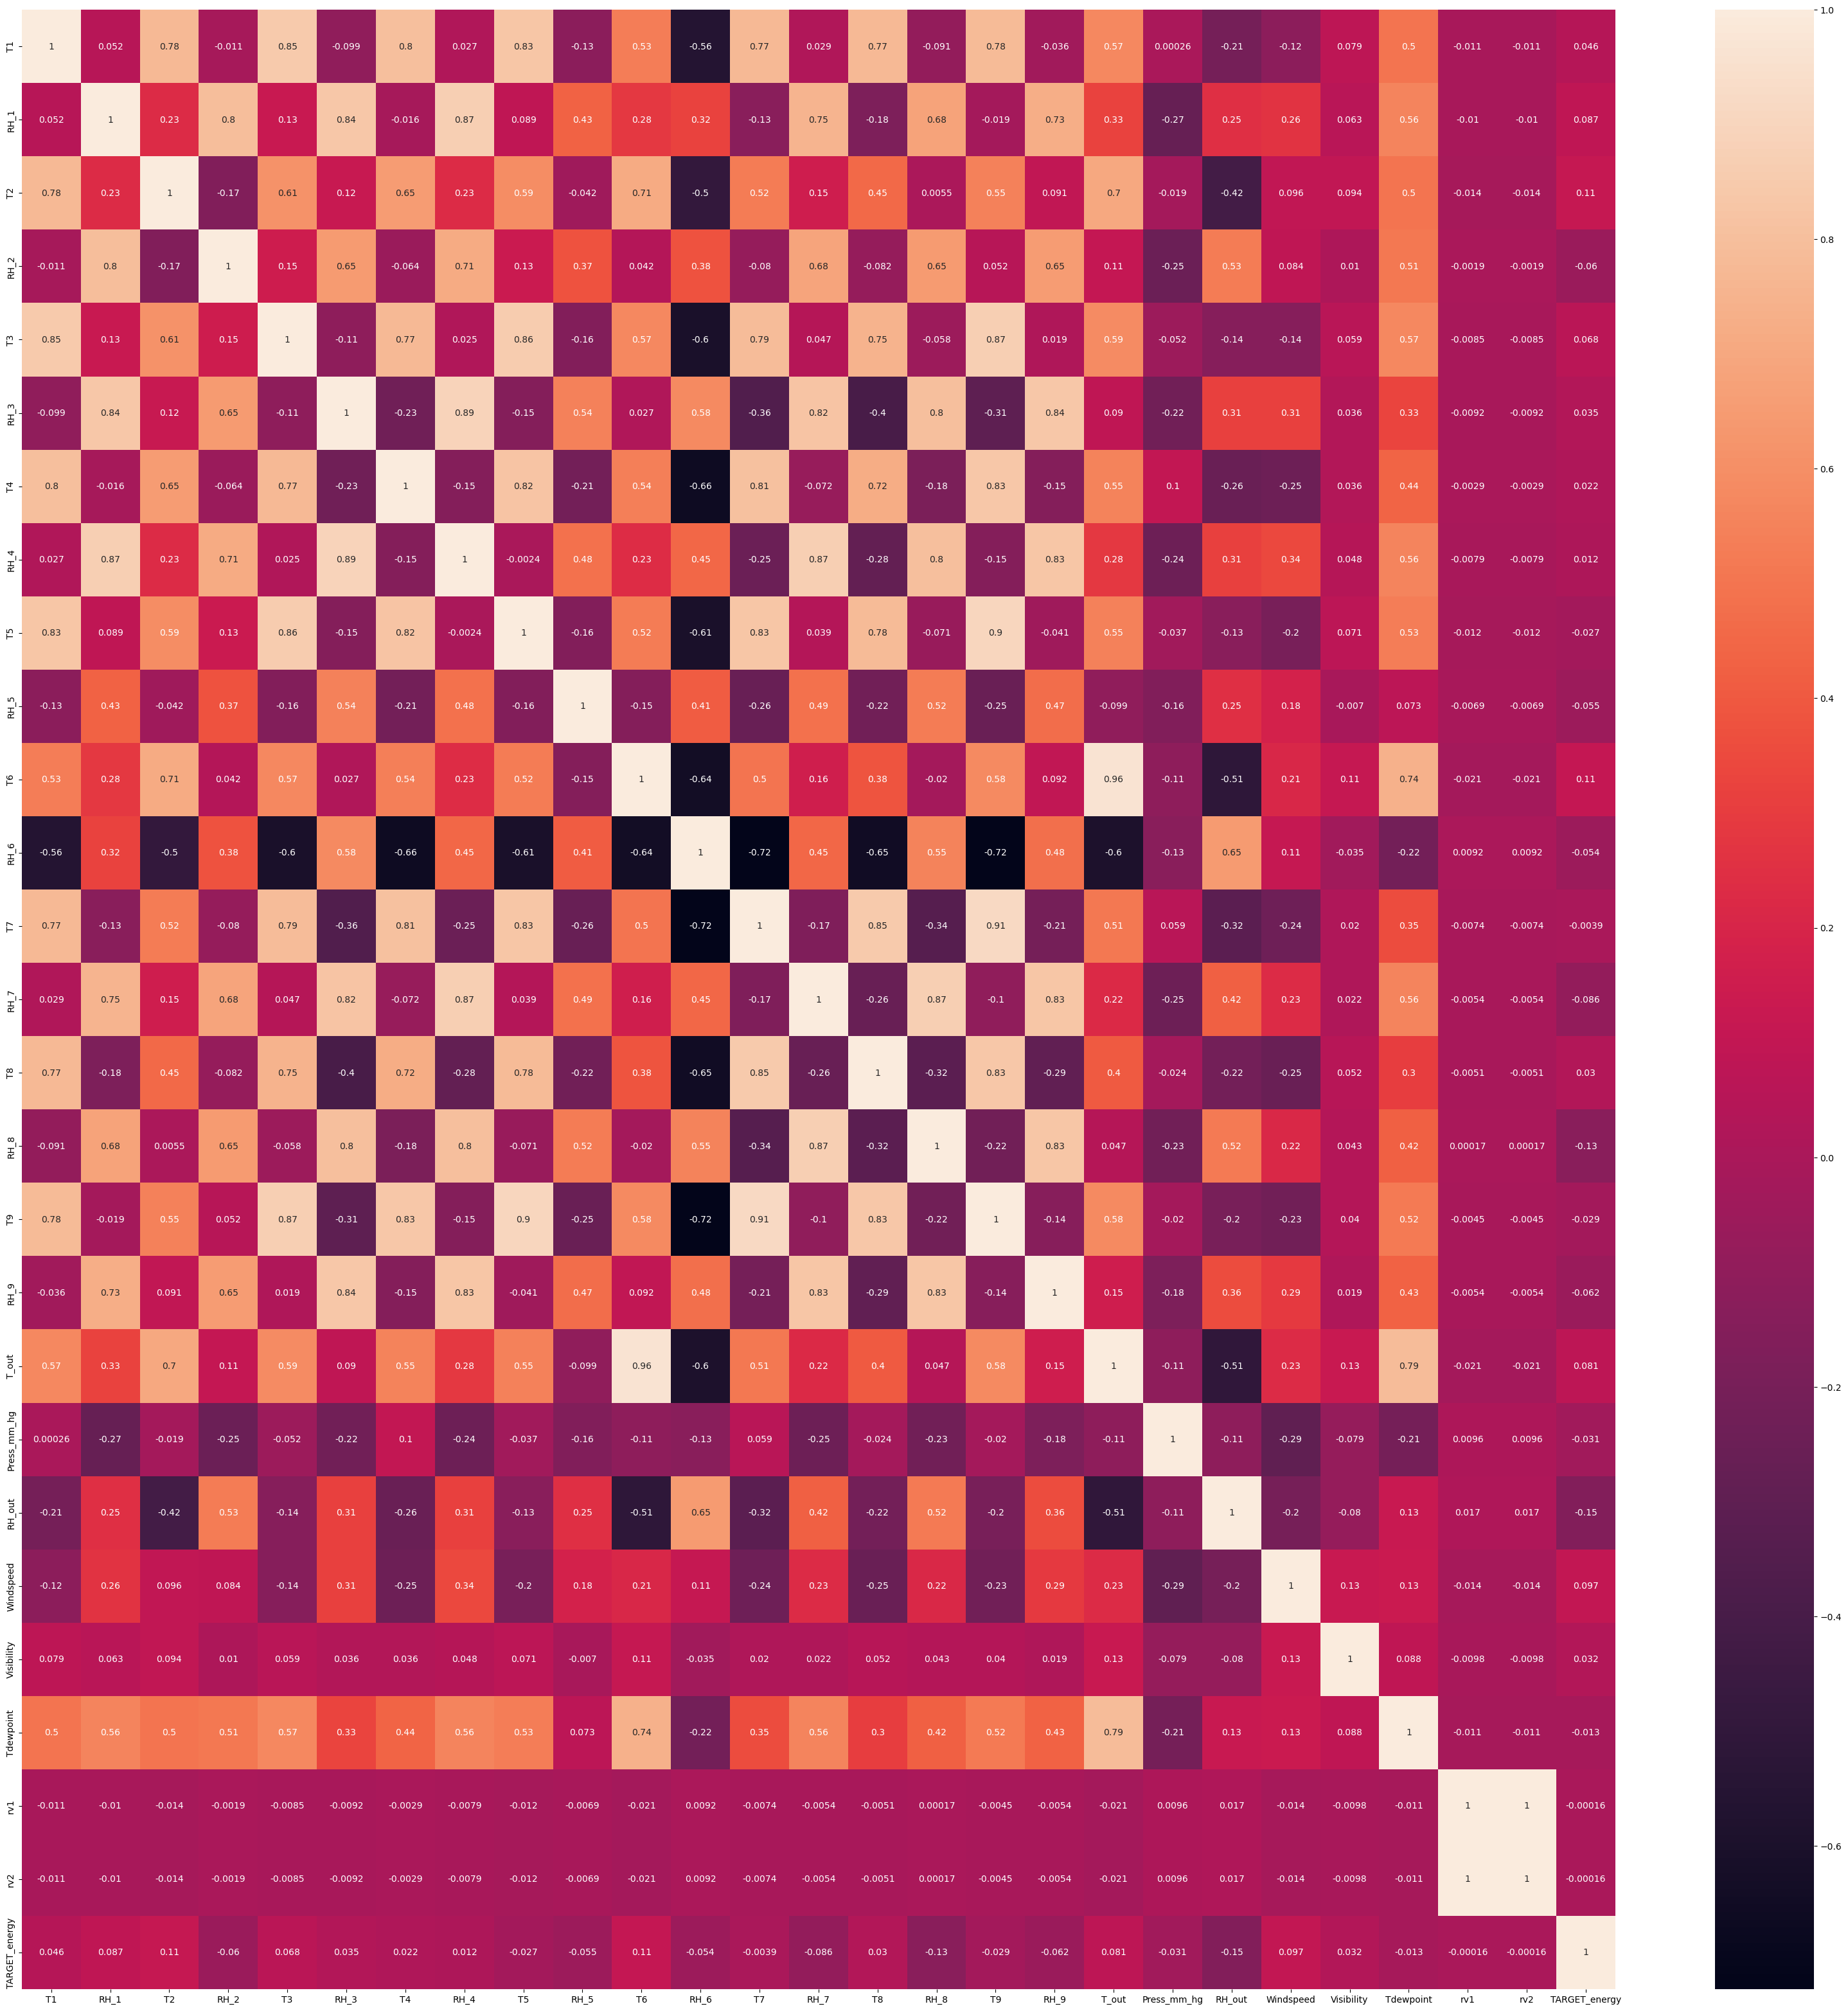

In [11]:
import seaborn as sns
plt.figure(figsize=(40,40))
correlation_table = df.corr()
sns.heatmap(correlation_table,annot=True)
plt.show()

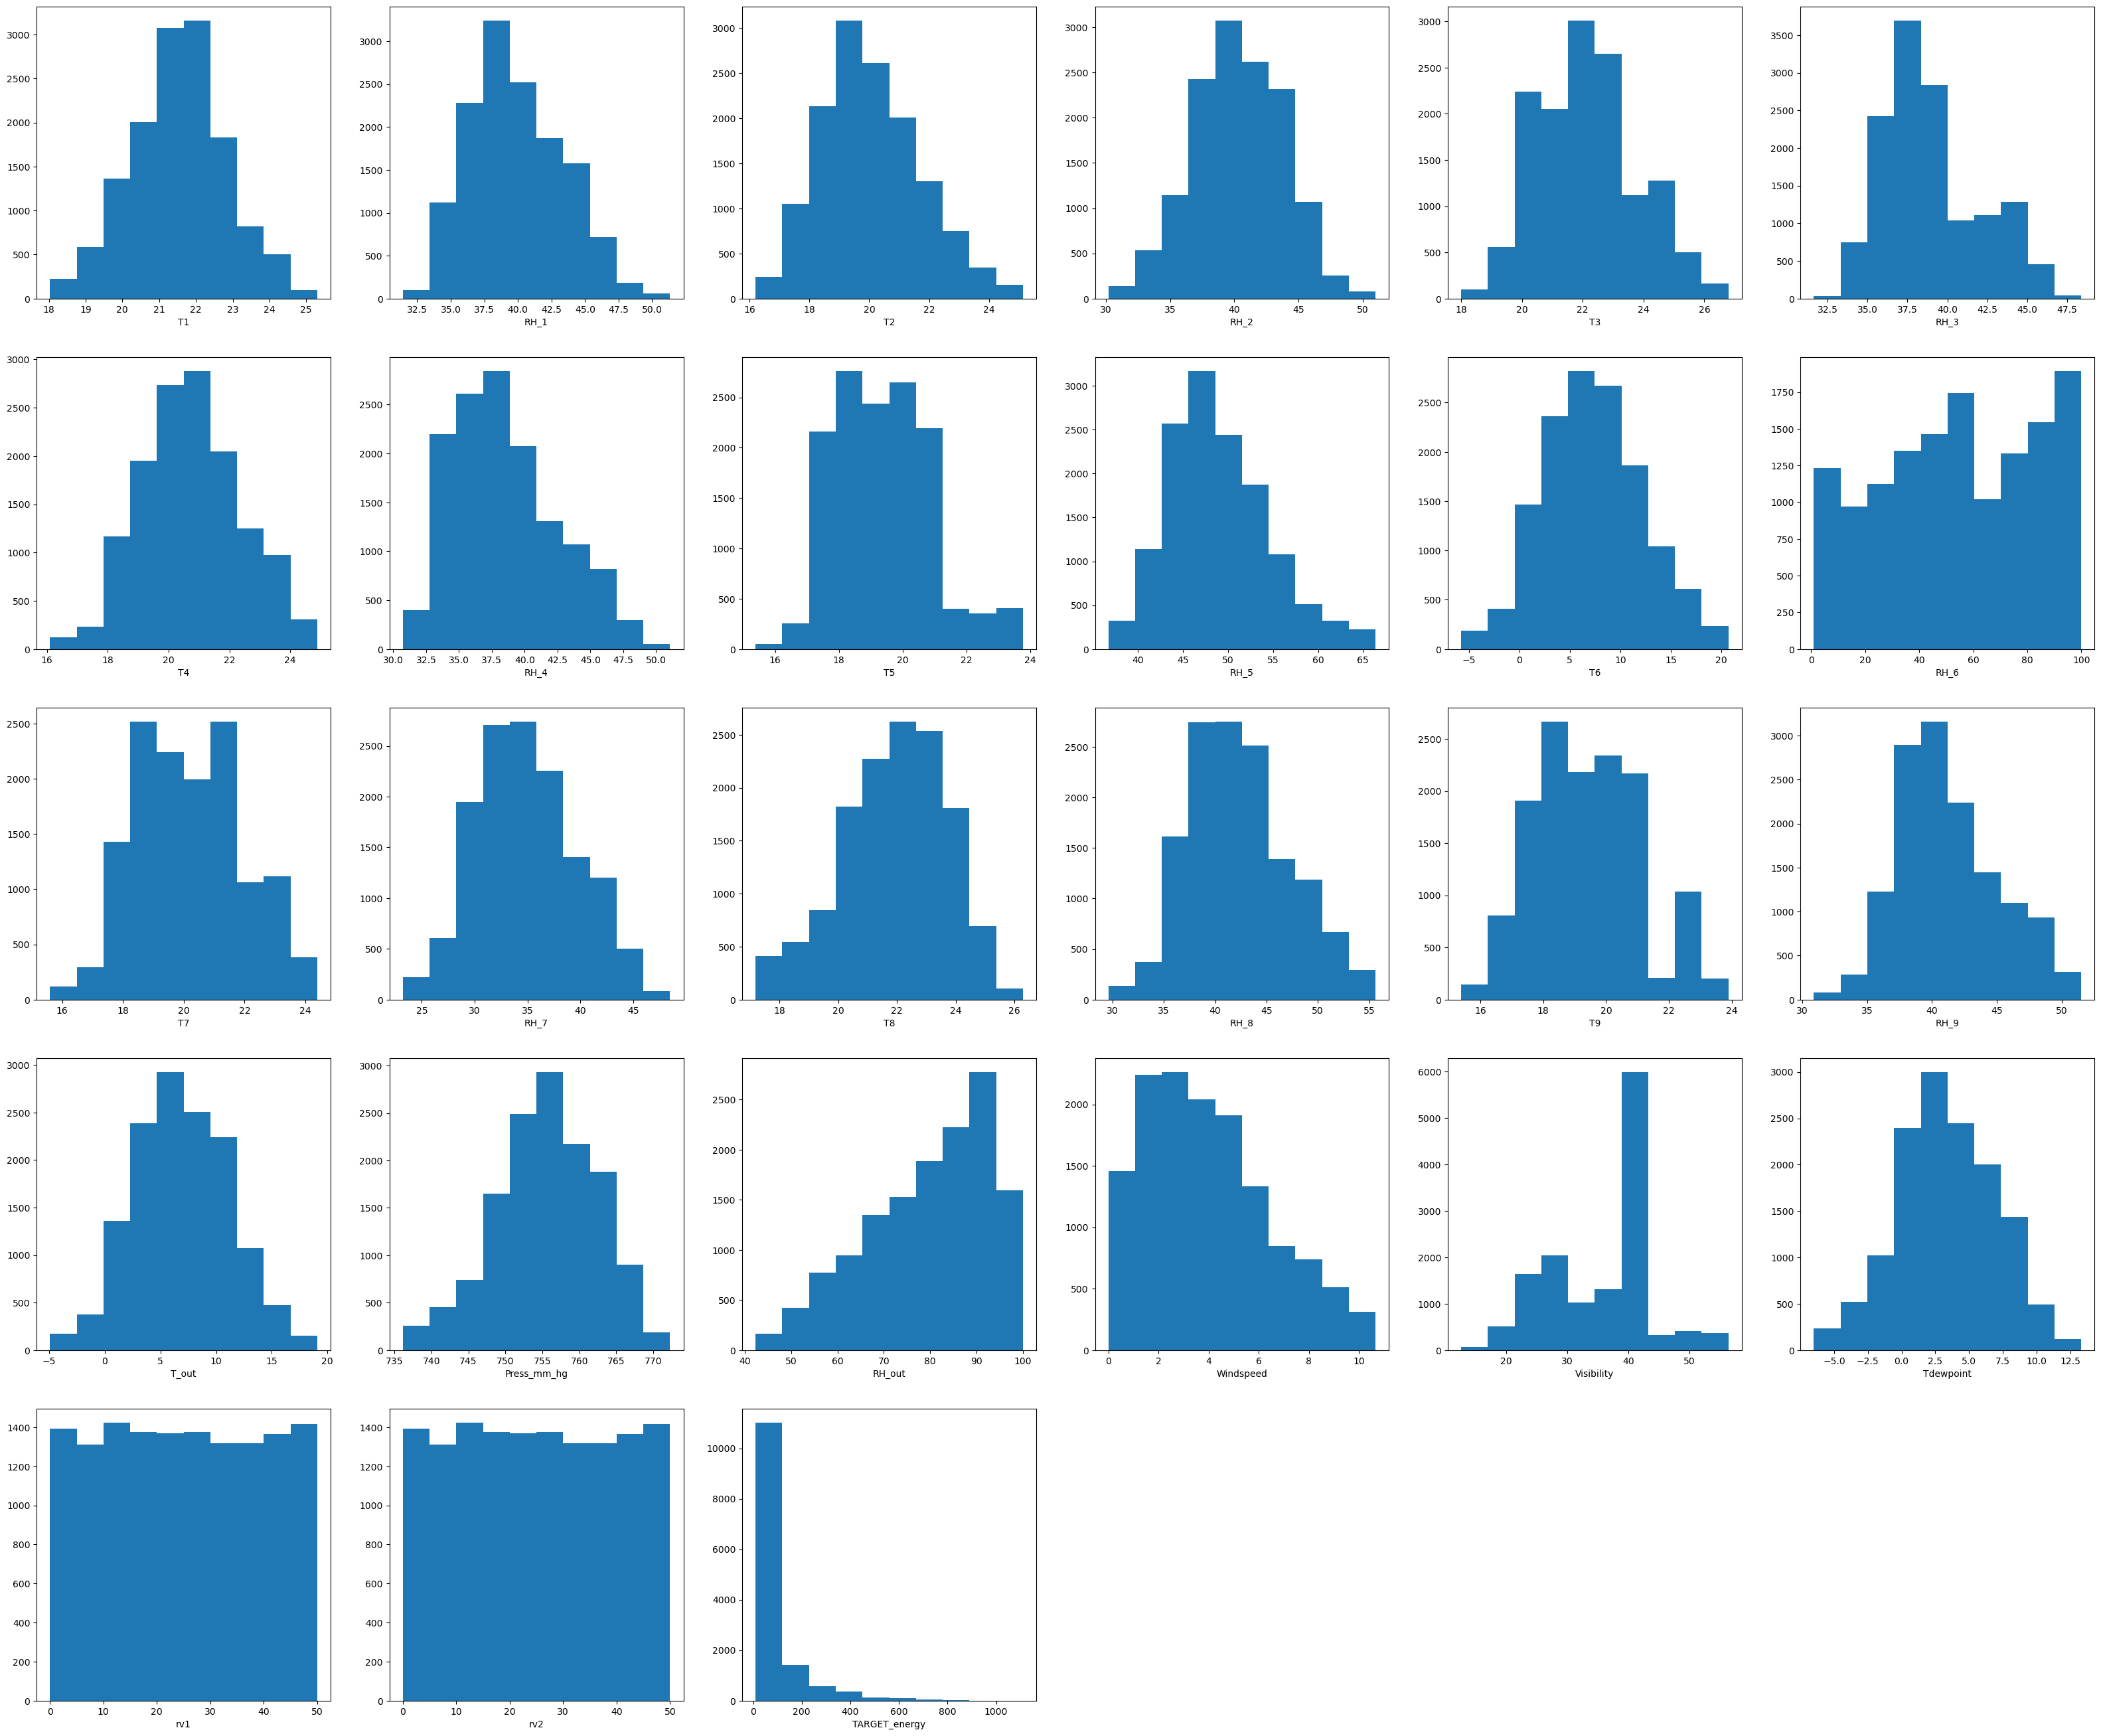

In [12]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.hist(df[col])
    plt.xlabel(col)
plt.show()

In [13]:
df = df.reset_index()

print(df['date'].dtype)

df = df.sort_values(by=['date'])

datetime64[ns]


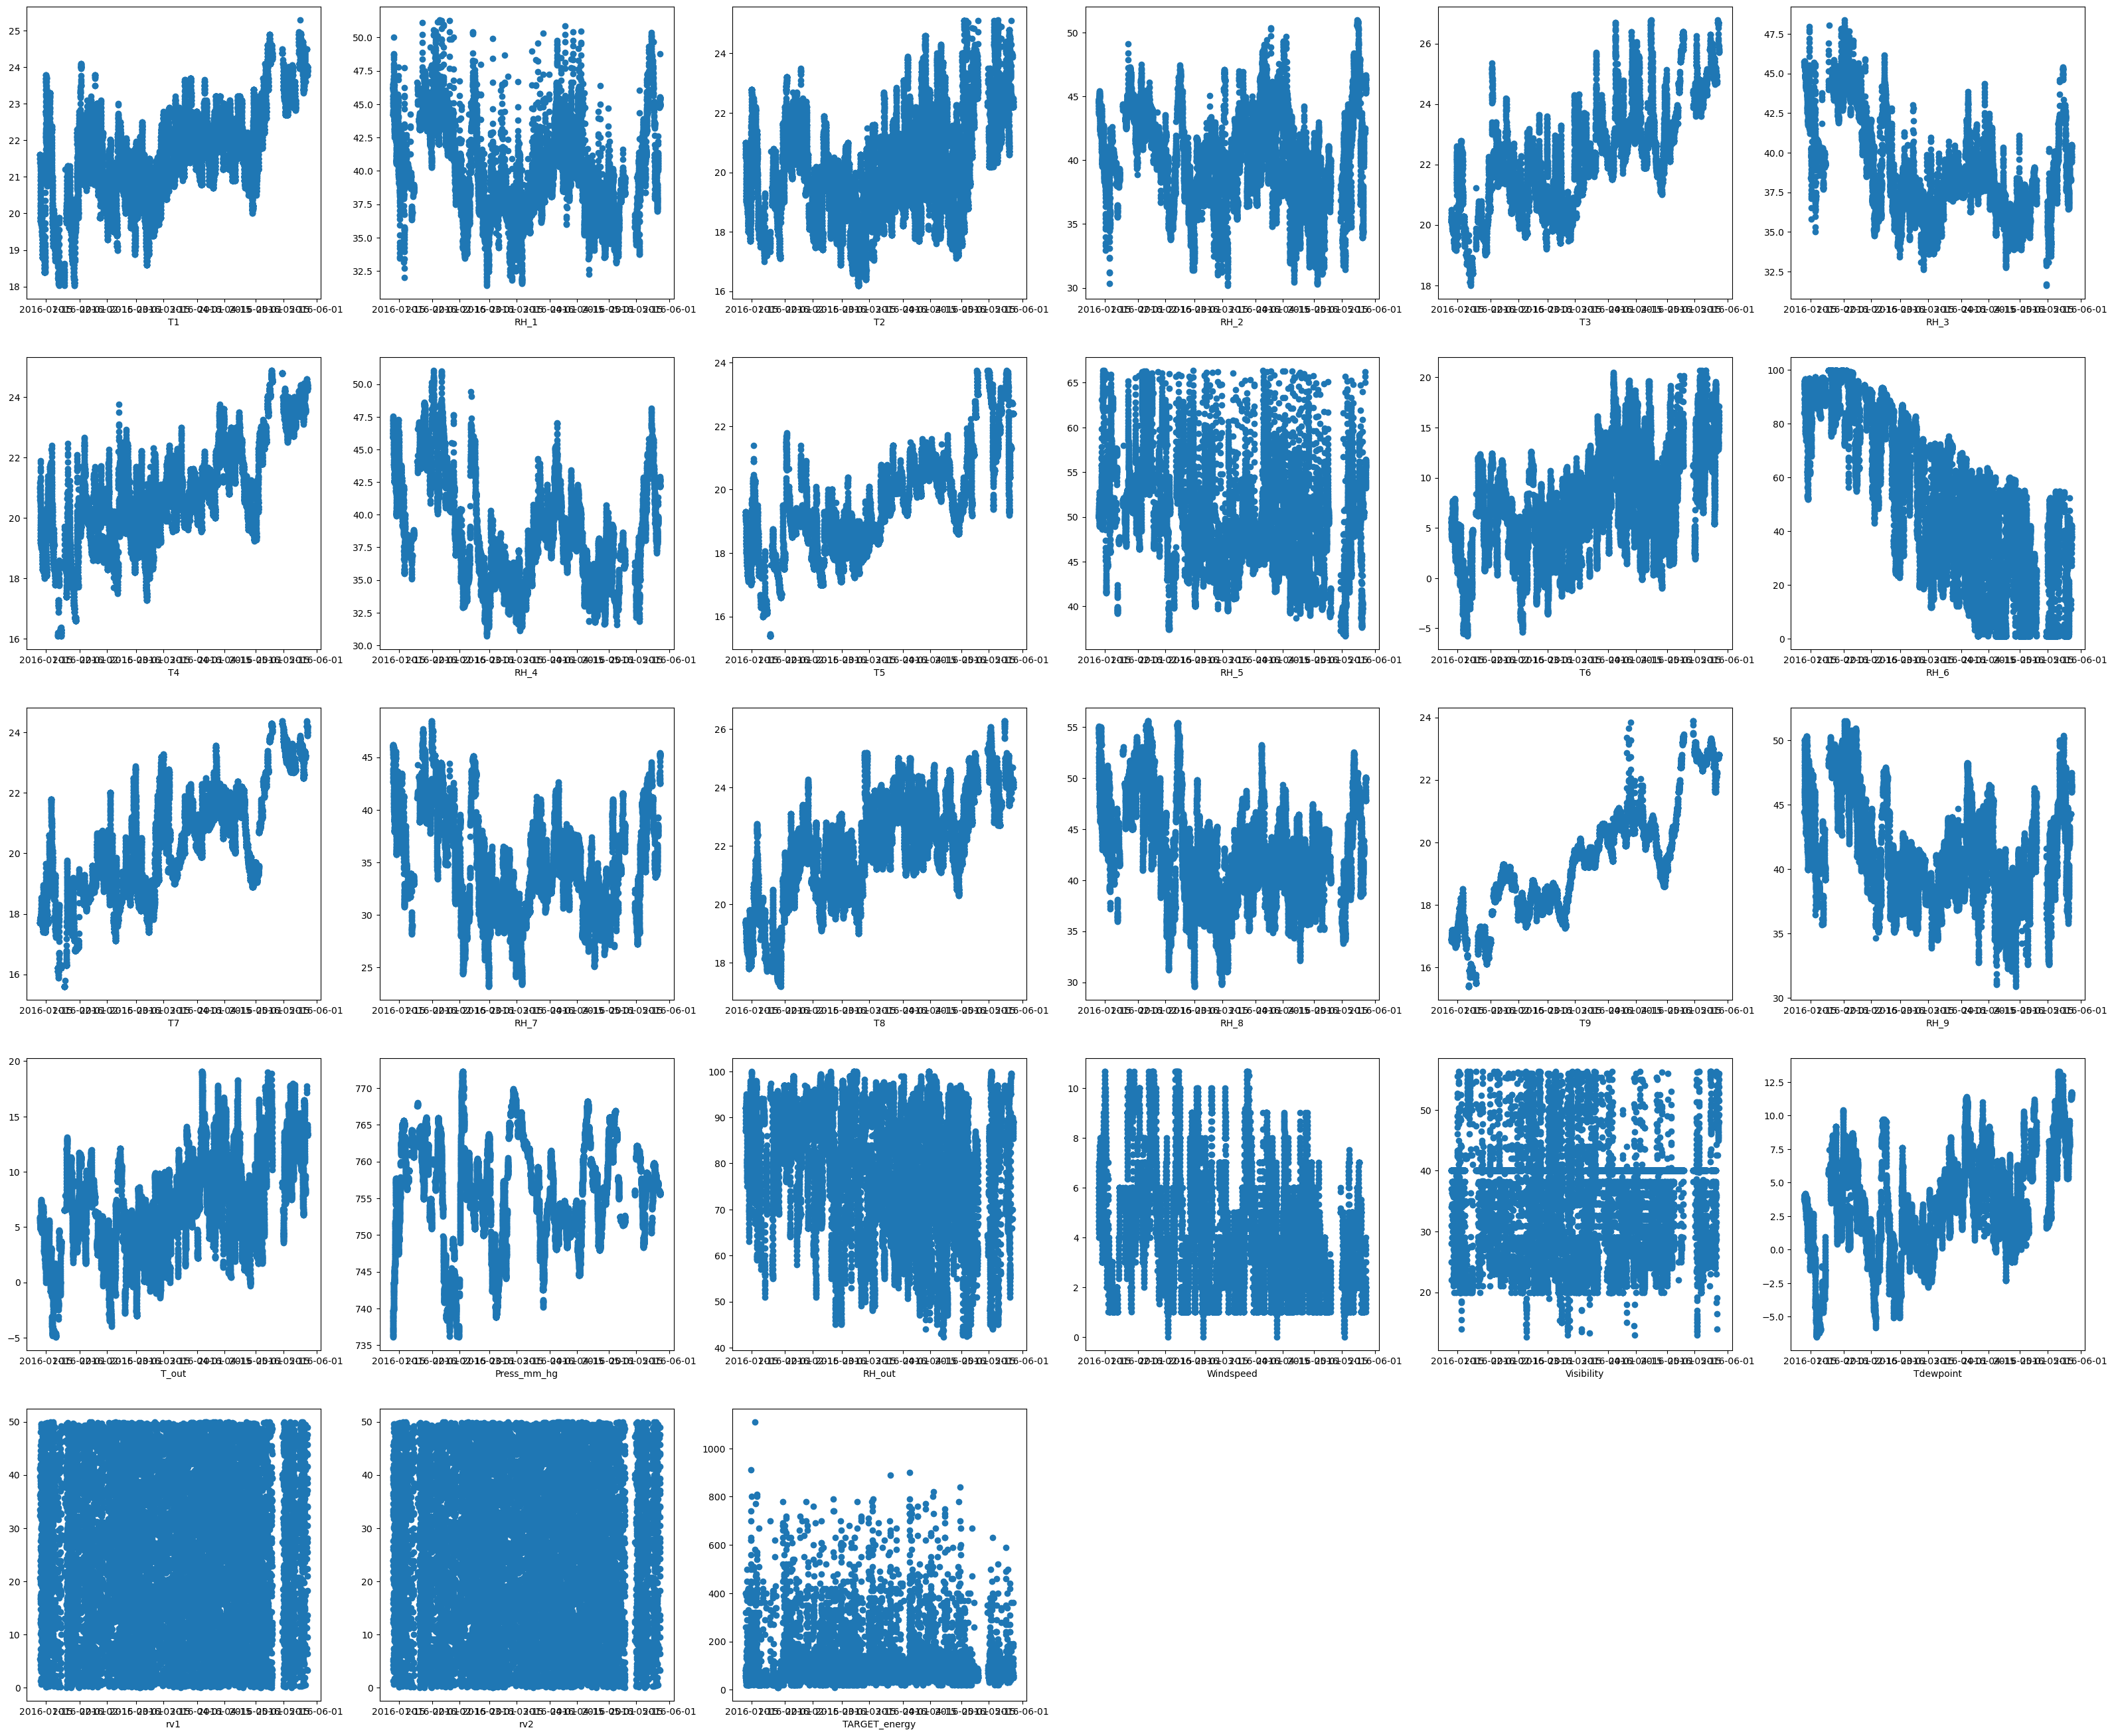

In [14]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6,6,i+1)  
    plt.scatter(df['date'], df[col])
    plt.xlabel(col)
plt.show()

In [15]:
df = df.drop(['RH_out','rv1','rv2','Visibility','RH_5'],axis=1)

# Part 2: Non neural supervised algorithm.

## Modelling using XGBoost

In [16]:
timeframe_df = df[["date", 'TARGET_energy']]
timeframe_df = timeframe_df.sort_values(by='date')
timeframe_df.set_index('date', inplace=True)
timeframe_df.head()

,TARGET_energy
date,
2016-01-11 22:40:00,260
2016-01-11 22:50:00,80
2016-01-11 23:00:00,80
2016-01-11 23:10:00,80
2016-01-11 23:20:00,60


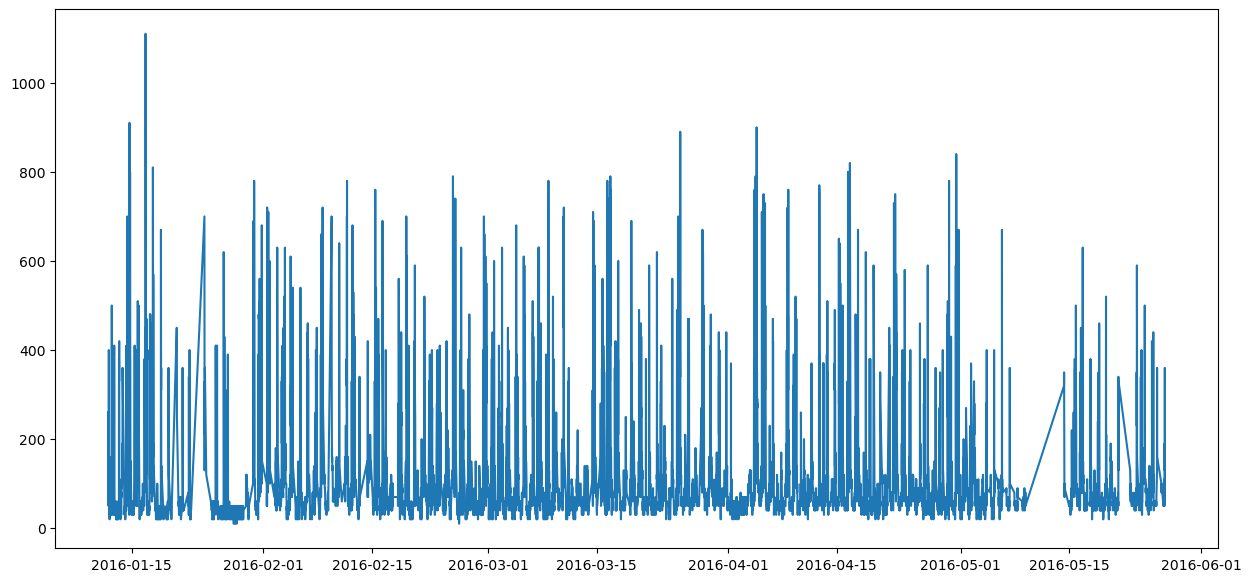

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(timeframe_df.index, timeframe_df['TARGET_energy'])

In [18]:
timeframe_df['hour'] = timeframe_df.index.hour
timeframe_df['day'] = timeframe_df.index.dayofweek
timeframe_df['month'] = timeframe_df.index.month

In [19]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(timeframe_df, test_size=0.2, shuffle=False)

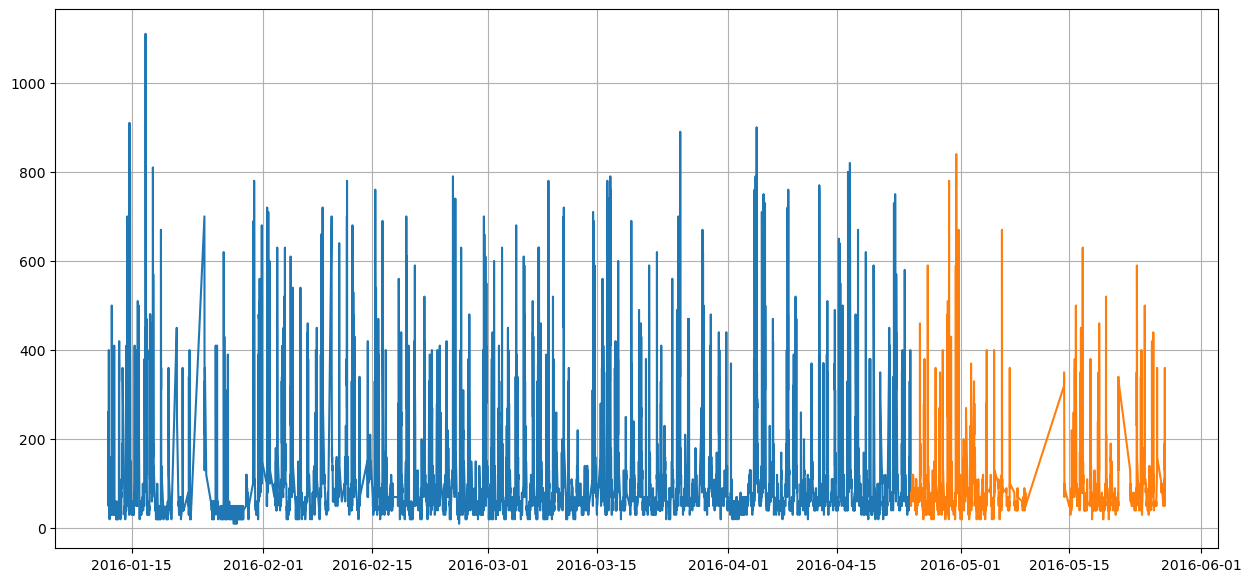

In [20]:
plt.figure(figsize=(15, 7))
plt.plot(training_data.index,training_data['TARGET_energy'])
plt.plot(testing_data.index,testing_data['TARGET_energy'])

plt.grid(True)
plt.show()

In [21]:
training_set, validation_set = train_test_split(training_data, test_size=0.2, shuffle=False)

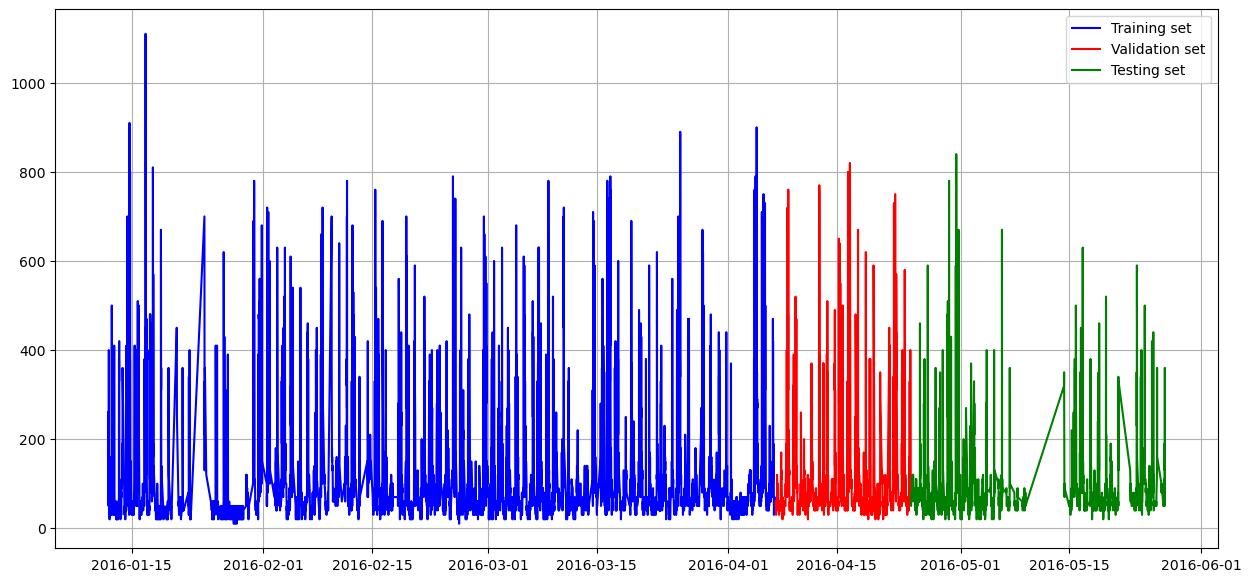

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set', color='blue')
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(testing_data.index,testing_data['TARGET_energy'], color='green')

plt.legend(["Training set","Validation set","Testing set"])
plt.grid(True)
plt.show()

In [23]:
! pip install xgboost
import xgboost as xgb

In [25]:
X_train, y_train = training_set.drop(columns=['TARGET_energy']), training_set['TARGET_energy']
X_test, y_test = validation_set.drop(columns=['TARGET_energy']), validation_set['TARGET_energy']


In [26]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
predictions = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(predictions,y_test)
rmse = math.sqrt(mse)

print(f"RMSE for training: {rmse}")
print(f"MSE for training: {mse}")

RMSE for training: 129.5598649309396
MSE for training: 16785.758600923313


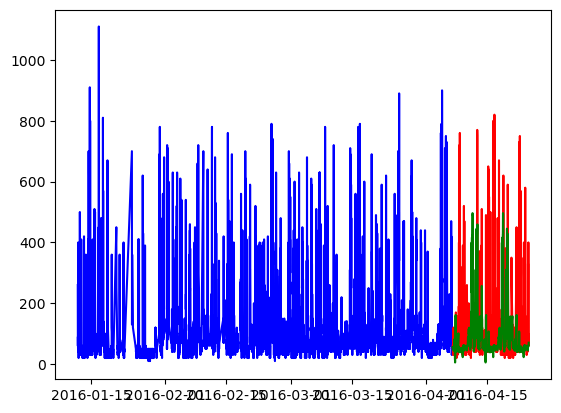

In [31]:
plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set', color='blue')
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(validation_set.index,predictions, color='green')